In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import HGate, ZGate
import kaleidoscope.qiskit
from kaleidoscope.interactive import qsphere
%matplotlib inline

C:\Users\josev\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [2]:
backend_state = Aer.get_backend('statevector_simulator')
backend = Aer.get_backend('qasm_simulator')
shots = 8192

In [9]:
qubits = QuantumRegister(3,name='data')
address = QuantumRegister(2,name='address')

qc = QuantumCircuit(qubits,address)

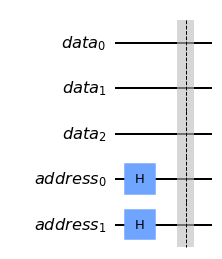

In [10]:
qc.h(address)
qc.barrier()
qc.draw('mpl')

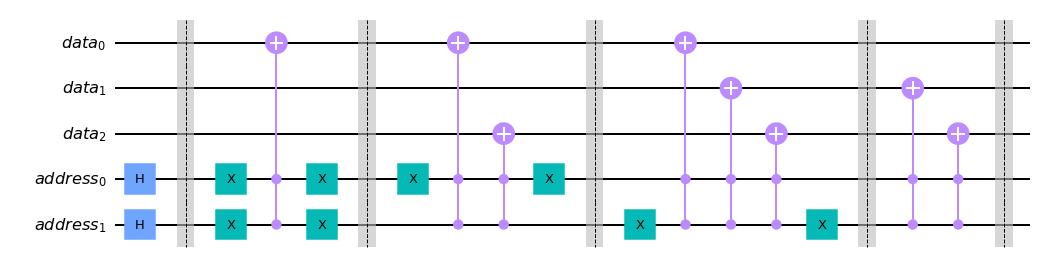

In [11]:
qc.x(address)
qc.mct(address,qubits[0])
qc.x(address)
qc.barrier()
qc.x(address[0])
qc.mct(address,qubits[0])
qc.mct(address,qubits[2])
qc.x(address[0])
qc.barrier()
qc.x(address[1])
qc.mct(address,qubits[0])
qc.mct(address,qubits[1])
qc.mct(address,qubits[2])
qc.x(address[1])
qc.barrier()
qc.mct(address,qubits[1])
qc.mct(address,qubits[2])
qc.barrier()
qc.draw('mpl')

In [12]:
qc = qc.reverse_bits()

In [13]:
statevector = execute(qc,backend=backend_state).result().get_statevector()
qsphere(statevector)

In [35]:
qubits = QuantumRegister(4,name='database')
ancilla = QuantumRegister(4,name='ancilla')
oracle = QuantumRegister(1,name='oracle')
address = QuantumRegister(2,name='address')
bits = ClassicalRegister(4,name='bits')
#bits2 = ClassicalRegister(2,name='bits2')

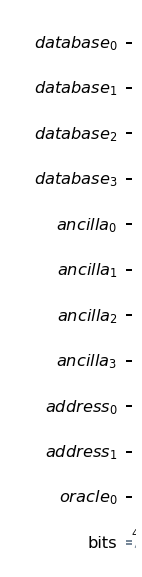

In [36]:
qc = QuantumCircuit(qubits,ancilla,address,oracle,bits)
qc.draw('mpl')

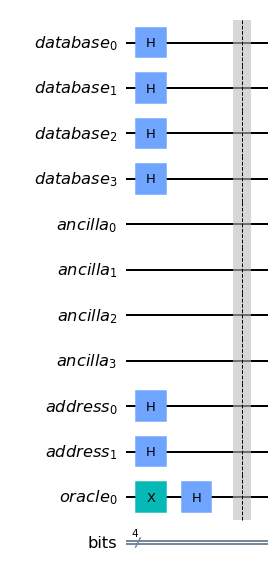

In [37]:
qc.h(address)
qc.x(oracle)
qc.h(oracle)
qc.h(qubits)
qc.barrier()
qc.draw('mpl')

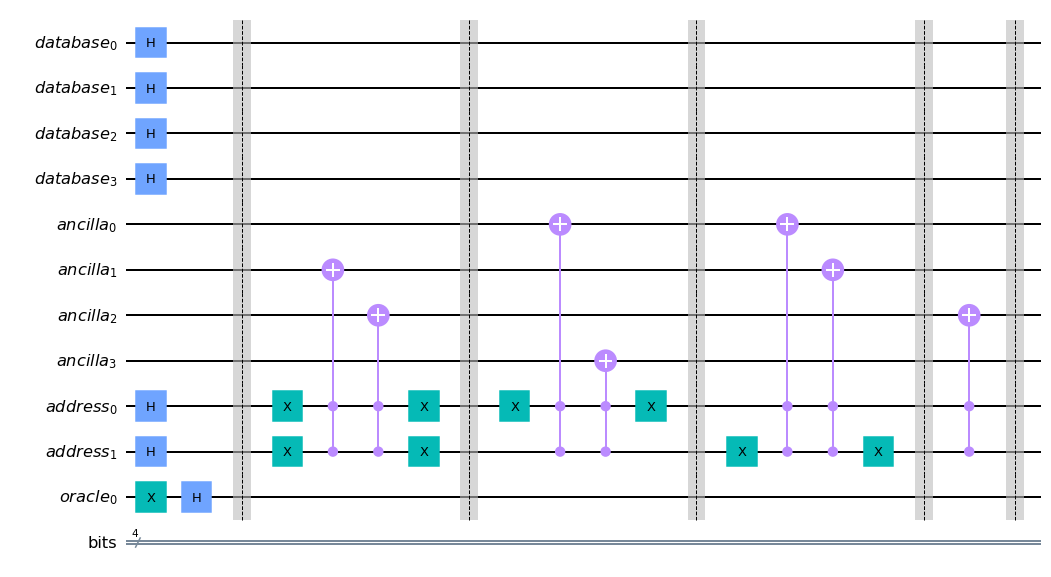

In [38]:
qc.x(address)
qc.mct(address,ancilla[1])
qc.mct(address,ancilla[2])
qc.x(address)
qc.barrier()
qc.x(address[0])
qc.mct(address,ancilla[0])
qc.mct(address,ancilla[3])
qc.x(address[0])
qc.barrier()
qc.x(address[1])
qc.mct(address,ancilla[0])
qc.mct(address,ancilla[1])
qc.x(address[1])
qc.barrier()
qc.mct(address,ancilla[2])
qc.barrier()
qc.draw('mpl')

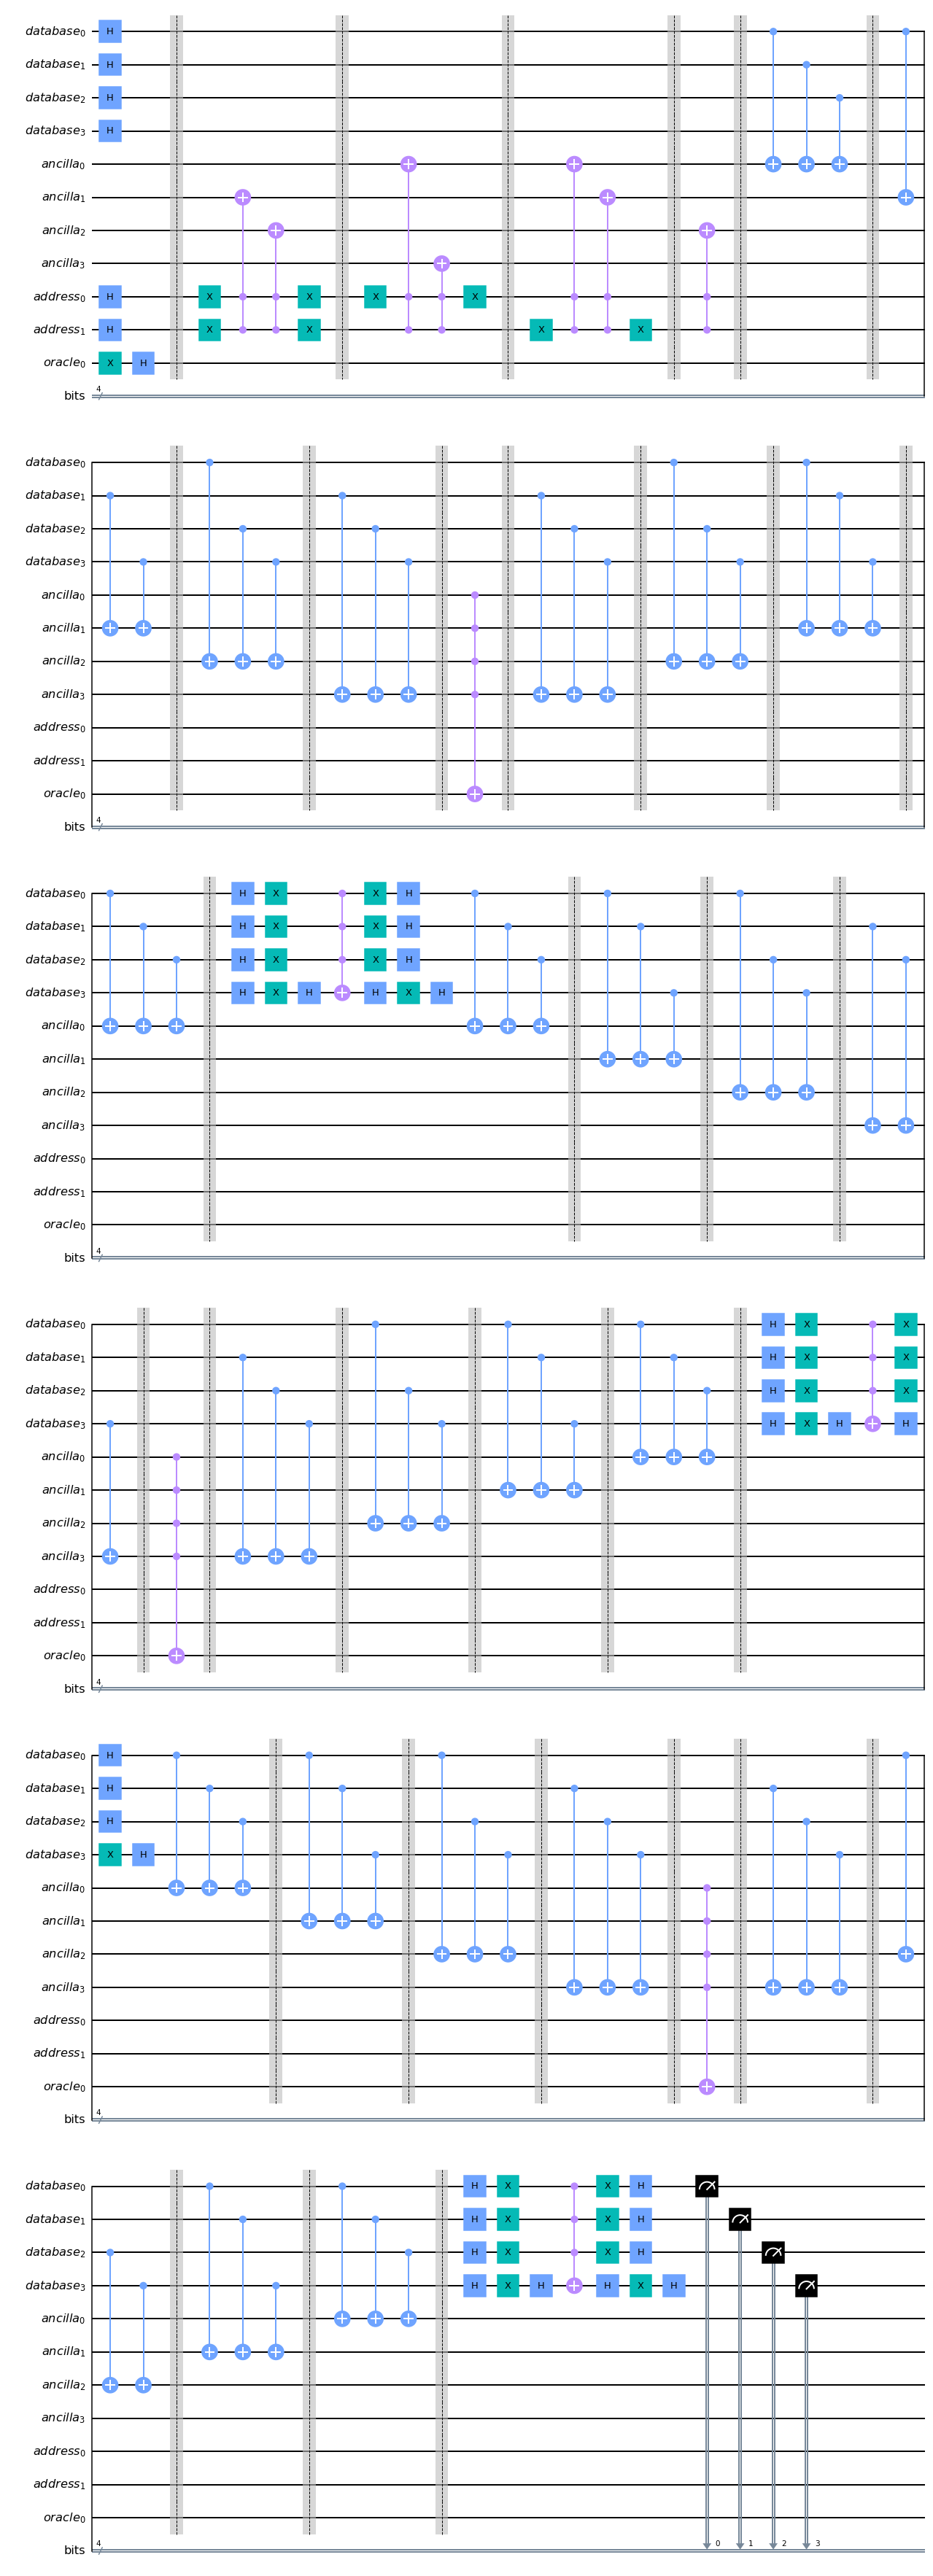

In [39]:
for x in range(3):
    qc.cx(qubits[0],ancilla[0])
    qc.cx(qubits[1],ancilla[0])
    qc.cx(qubits[2],ancilla[0])
    qc.barrier()
    qc.cx(qubits[0],ancilla[1])
    qc.cx(qubits[1],ancilla[1])
    qc.cx(qubits[3],ancilla[1])
    qc.barrier()
    qc.cx(qubits[0],ancilla[2])
    qc.cx(qubits[2],ancilla[2])
    qc.cx(qubits[3],ancilla[2])
    qc.barrier()
    qc.cx(qubits[1],ancilla[3])
    qc.cx(qubits[2],ancilla[3])
    qc.cx(qubits[3],ancilla[3])
    qc.barrier()
    #qc.x(ancilla[1])
    #qc.x(ancilla[2])
    qc.mct(ancilla,oracle)
    #qc.x(ancilla[2])
    #qc.x(ancilla[1])
    qc.barrier()
    qc.cx(qubits[1],ancilla[3])
    qc.cx(qubits[2],ancilla[3])
    qc.cx(qubits[3],ancilla[3])
    qc.barrier()
    qc.cx(qubits[0],ancilla[2])
    qc.cx(qubits[2],ancilla[2])
    qc.cx(qubits[3],ancilla[2])
    qc.barrier()
    qc.cx(qubits[0],ancilla[1])
    qc.cx(qubits[1],ancilla[1])
    qc.cx(qubits[3],ancilla[1])
    qc.barrier()
    qc.cx(qubits[0],ancilla[0])
    qc.cx(qubits[1],ancilla[0])
    qc.cx(qubits[2],ancilla[0])
    qc.barrier()
    qc.h(qubits)
    qc.x(qubits)
    qc.h(qubits[3])
    qc.mct(qubits[0:3],qubits[3])
    qc.h(qubits[3])
    qc.x(qubits)
    qc.h(qubits)
qc.measure(qubits,bits)
#qc.measure(address,bits2)
qc.draw('mpl')

In [40]:
qc = qc.reverse_bits()

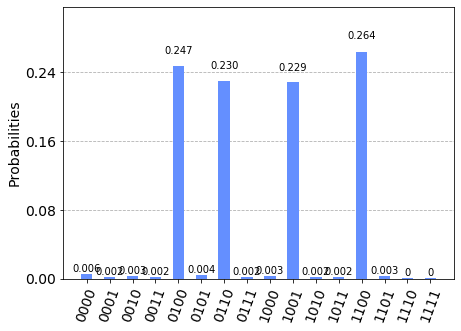

In [41]:
job = execute(qc,backend=backend,shots=1024).result().get_counts()
plot_histogram(job)